# AutoGluon Binary

In [1]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
binaryDf = TabularDataset('binary_dataset.csv')

/Users/axelsariel/repos/HousingDemographics/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data, test_data = train_test_split(binaryDf, test_size=0.25, random_state=0)
label = 'GrowthRate'
train_data[label].value_counts(normalize=True)

GrowthRate
 1.0    0.862346
 0.0    0.071063
-1.0    0.066591
Name: proportion, dtype: float64

In [19]:
train_data.to_csv('binary_train_data.csv', index=False)
test_data.to_csv('binary_test_data.csv', index=False)

In [3]:
predictor = TabularPredictor(label=label).fit(train_data, time_limit=300)

No path specified. Models will be saved in: "AutogluonModels/ag-20240501_014502"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240501_014502"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.0.0: Fri S

In [4]:
y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

11553     1.0
1177      1.0
3111      1.0
111294    1.0
173138    1.0
Name: GrowthRate, dtype: float64

In [5]:
y_pred.describe()

count    62532.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: GrowthRate, dtype: float64

In [15]:
predsVsActual = pd.DataFrame({'predictions': y_pred, 'actual': test_data['GrowthRate']})
predsVsActual.head()

,predictions,actual
11553,1.0,1.0
1177,1.0,1.0
3111,1.0,1.0
111294,1.0,1.0
173138,1.0,1.0


In [16]:
predsVsActual.to_csv('predictions_binary_autogluon.csv', index=False)

In [6]:
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.8622945052133307,
 'balanced_accuracy': 0.3333333333333333,
 'mcc': 0.0}

In [10]:
resultsDf = predictor.leaderboard(test_data)
resultsDf

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.862295,0.8624,accuracy,0.034896,0.006921,1.392398,0.034896,0.006921,1.392398,1,True,8
1,NeuralNetTorch,0.862295,0.8624,accuracy,0.214610,0.012760,65.787699,0.214610,0.012760,65.787699,1,True,9
2,RandomForestEntr,0.862295,0.8624,accuracy,0.383619,0.081269,8.117567,0.383619,0.081269,8.117567,1,True,5
3,RandomForestGini,0.862295,0.8624,accuracy,0.388786,0.081144,7.966919,0.388786,0.081144,7.966919,1,True,4
4,ExtraTreesGini,0.862295,0.8624,accuracy,0.392690,0.093991,6.984248,0.392690,0.093991,6.984248,1,True,6
5,ExtraTreesEntr,0.862295,0.8624,accuracy,0.403470,0.080082,6.811753,0.403470,0.080082,6.811753,1,True,7
6,WeightedEnsemble_L2,0.862295,0.8624,accuracy,0.407601,0.082108,6.930146,0.004131,0.002026,0.118393,2,True,10
7,NeuralNetFastAI,0.862295,0.8624,accuracy,0.723723,0.056632,131.717333,0.723723,0.056632,131.717333,1,True,3
8,KNeighborsUnif,0.831862,0.8280,accuracy,3.397084,0.191654,4.298899,3.397084,0.191654,4.298899,1,True,1
9,KNeighborsDist,0.831814,0.8280,accuracy,2.933942,0.145967,0.358532,2.933942,0.145967,0.358532,1,True,2


In [8]:
predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 6 features using 5000 rows with 5 shuffle sets...
	6.68s	= Expected runtime (1.34s per shuffle set)
	2.18s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
WHITE,0.0,0.0,0.5,5,0.0,0.0
BLACK_OR_AFRICAN_AMERICAN,0.0,0.0,0.5,5,0.0,0.0
AMERICAN_INDIAN_AND_ALASKA_NATIVE,0.0,0.0,0.5,5,0.0,0.0
ASIAN,0.0,0.0,0.5,5,0.0,0.0
NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,0.0,0.0,0.5,5,0.0,0.0
HISPANIC_OR_LATINO,0.0,0.0,0.5,5,0.0,0.0


In [13]:
resultsDf.to_csv('results_binary_autogluon.csv', index=False)

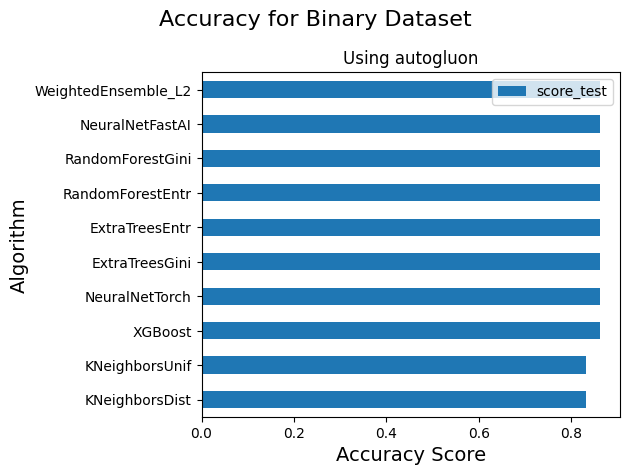

In [11]:
import matplotlib.pyplot as plt
toPlot = resultsDf.sort_values('score_test')
ax = toPlot.plot.barh(x='model', y='score_test')
plt.title('Using autogluon', fontsize=12)
plt.suptitle('Accuracy for Binary Dataset', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()